<a href="https://colab.research.google.com/github/fjadidi2001/Image_Inpaint/blob/main/overview_NOV27_FJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Loading Dataset


In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

# Check if dataset loaded correctly
if ds is None:
    raise ValueError("Dataset not loaded correctly")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/224 [00:00<?, ?B/s]

(…)-00000-of-00003-30fbdf94a5d8e722.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00001-of-00003-74b418aa7a721747.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

(…)-00002-of-00003-4f9459a488896f53.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/202599 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

# Print basic information about the dataset
print("Dataset structure:")
print(ds)

# Inspect the first few items in the training set
print("\nFirst few items in the training set:")
for i, item in enumerate(ds['train'].take(5)):
    print(f"Item {i}:")
    for key, value in item.items():
        if key == 'image':
            print(f"  {key}: <PIL.Image.Image image mode={value.mode} size={value.size}>")
        else:
            print(f"  {key}: {value}")
    print()

# Get all column names (attributes)
column_names = list(ds['train'].features.keys())
print("\nColumn names:")
print(column_names)

# Convert a small subset of the dataset to a pandas DataFrame for easier inspection
df = pd.DataFrame(ds['train'].select(range(100)))
print("\nDataFrame head:")
print(df.head())

# Print data types of columns
print("\nColumn data types:")
print(df.dtypes)

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 202599
    })
})

First few items in the training set:
Item 0:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 1:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 2:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 3:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>

Item 4:
  image: <PIL.Image.Image image mode=RGB size=(178, 218)>


Column names:
['image']

DataFrame head:
                                               image
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...

Column data types:
image    object
dtype: object


# Step 2: Exploratory Data Analysis (EDA)


Basic statistics of image properties:
        width  height  aspect_ratio
count  1000.0  1000.0   1000.000000
mean    178.0   218.0      0.816514
std       0.0     0.0      0.000000
min     178.0   218.0      0.816514
25%     178.0   218.0      0.816514
50%     178.0   218.0      0.816514
75%     178.0   218.0      0.816514
max     178.0   218.0      0.816514


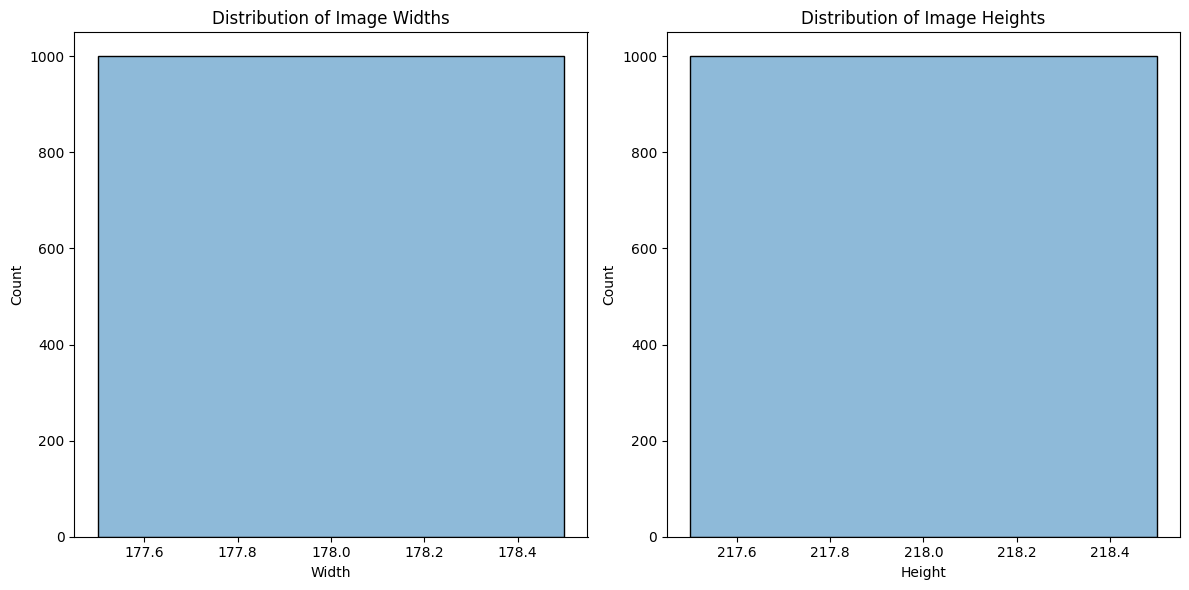

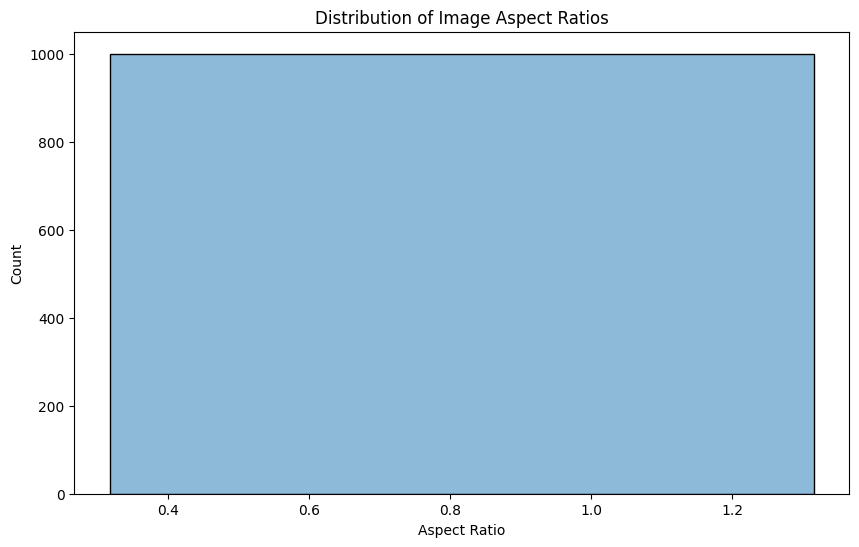

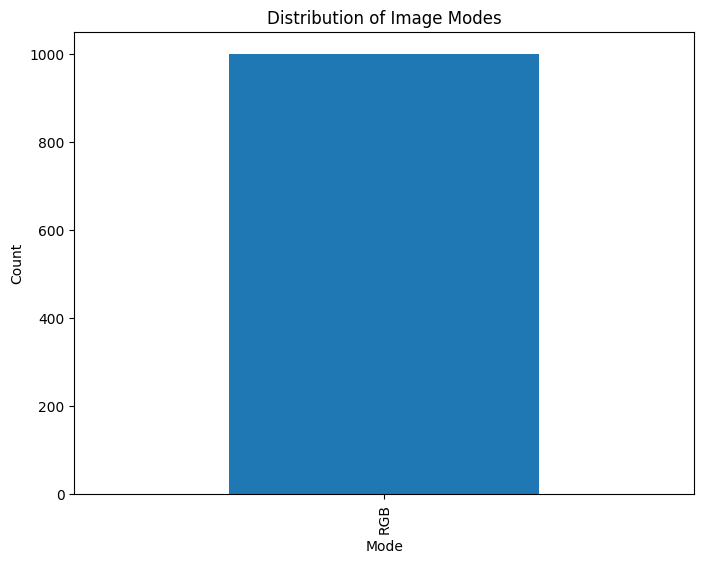

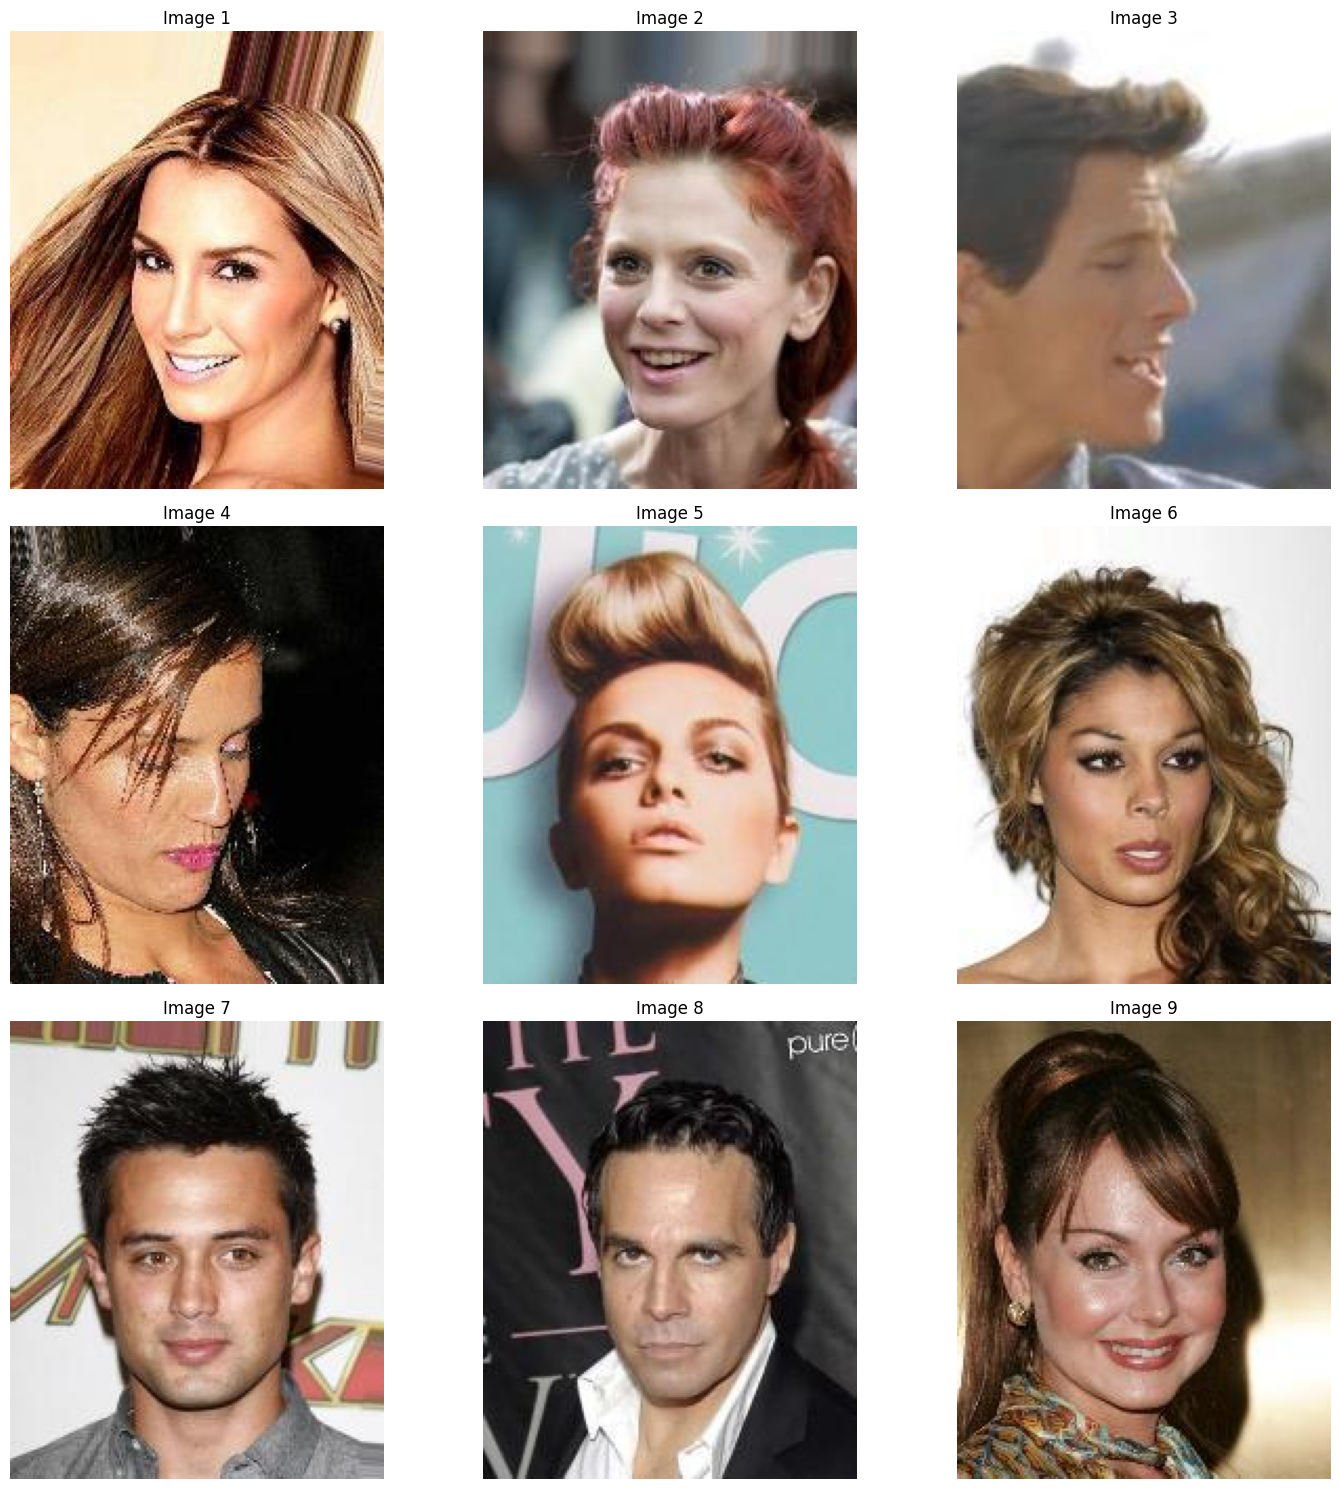

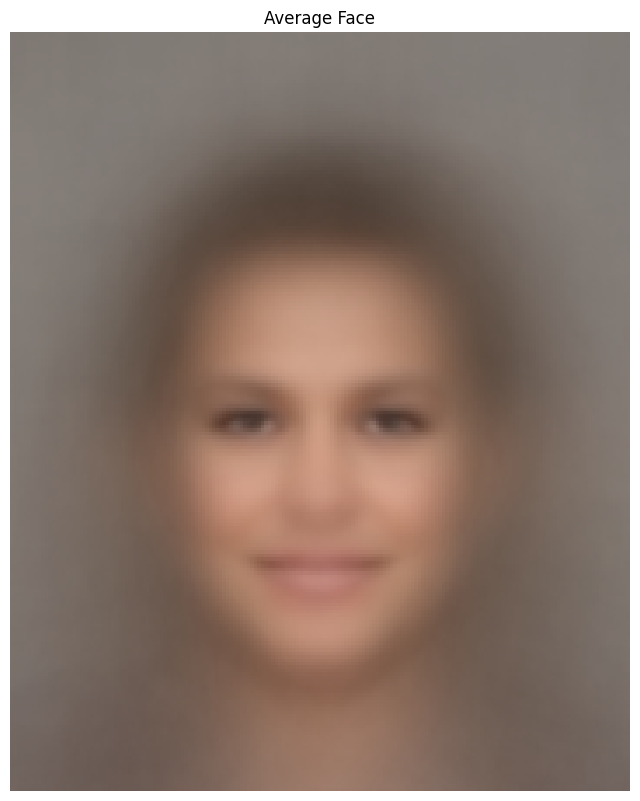

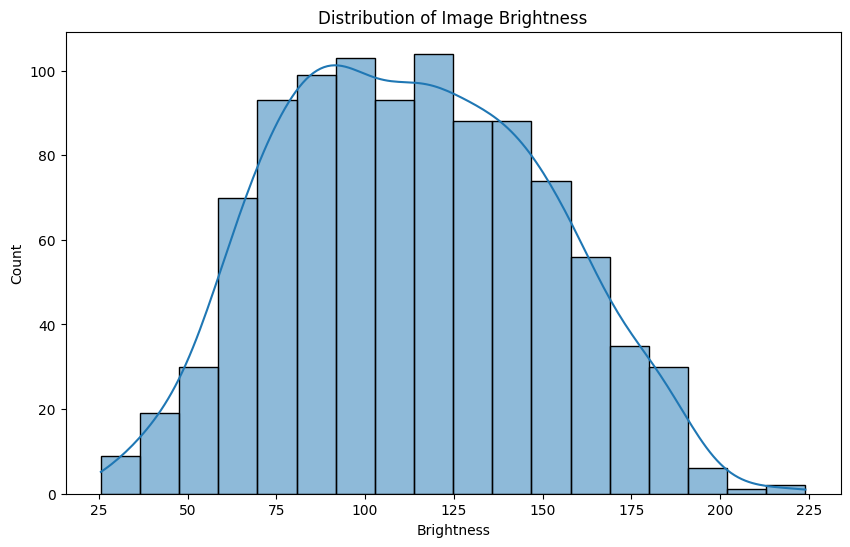

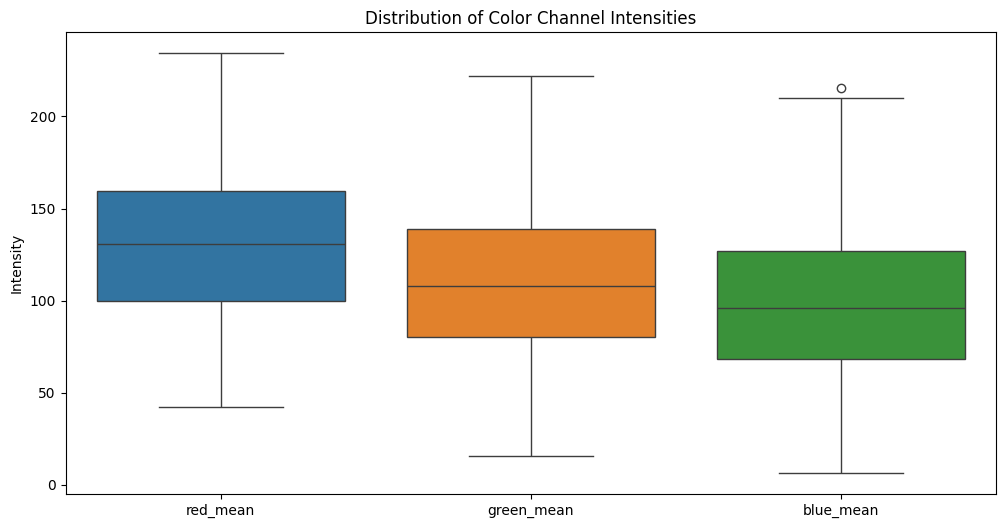

EDA complete. Please review the generated visualizations and statistics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import numpy as np
from PIL import Image
import io

# Load the dataset (assuming it's already loaded as 'ds')

# Function to extract image properties
def get_image_properties(image):
    return {
        'width': image.width,
        'height': image.height,
        'aspect_ratio': image.width / image.height,
        'mode': image.mode
    }

# Extract properties for a subset of images
num_samples = 1000
image_properties = [get_image_properties(item['image']) for item in ds['train'].select(range(num_samples))]
df_properties = pd.DataFrame(image_properties)

# 1. Basic statistics of image properties
print("Basic statistics of image properties:")
print(df_properties.describe())

# 2. Distribution of image dimensions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_properties['width'], kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')

plt.subplot(1, 2, 2)
sns.histplot(df_properties['height'], kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.tight_layout()
plt.show()

# 3. Distribution of aspect ratios
plt.figure(figsize=(10, 6))
sns.histplot(df_properties['aspect_ratio'], kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.show()

# 4. Image modes
mode_counts = df_properties['mode'].value_counts()
plt.figure(figsize=(8, 6))
mode_counts.plot(kind='bar')
plt.title('Distribution of Image Modes')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

# 5. Sample images visualization
def plot_sample_images(dataset, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        image = dataset['train'][i]['image']
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Image {i+1}")
    plt.tight_layout()
    plt.show()

plot_sample_images(ds)

# 6. Average image
def compute_average_image(dataset, num_samples=1000):
    sample_images = dataset['train'].select(range(num_samples))
    avg_image = np.zeros((218, 178, 3), dtype=np.float32)

    for item in sample_images:
        img_array = np.array(item['image'], dtype=np.float32)
        avg_image += img_array

    avg_image /= num_samples
    return avg_image.astype(np.uint8)

avg_image = compute_average_image(ds)
plt.figure(figsize=(8, 10))
plt.imshow(avg_image)
plt.title('Average Face')
plt.axis('off')
plt.show()

# 7. Image brightness distribution
def compute_brightness(image):
    return np.mean(image)

brightness_values = [compute_brightness(item['image']) for item in ds['train'].select(range(num_samples))]

plt.figure(figsize=(10, 6))
sns.histplot(brightness_values, kde=True)
plt.title('Distribution of Image Brightness')
plt.xlabel('Brightness')
plt.show()

# 8. Color channel analysis
def analyze_color_channels(image):
    r, g, b = image.split()
    return {
        'red_mean': np.mean(r),
        'green_mean': np.mean(g),
        'blue_mean': np.mean(b)
    }

color_data = [analyze_color_channels(item['image']) for item in ds['train'].select(range(num_samples))]
df_colors = pd.DataFrame(color_data)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_colors)
plt.title('Distribution of Color Channel Intensities')
plt.ylabel('Intensity')
plt.show()

print("EDA complete. Please review the generated visualizations and statistics.")

This code snippet begins by importing necessary libraries for data visualization and manipulation: `matplotlib.pyplot` for basic plotting, `seaborn` for enhanced statistical graphics, `datasets` for loading datasets, `pandas` for data handling, `numpy` for numerical operations, and `PIL` for image processing. The comment indicates that a dataset is to be loaded (presumably already assigned to the variable 'ds'), and although the actual data loading and visualization code is not shown, it culminates with a print statement indicating that exploratory data analysis (EDA) is complete, prompting the user to review the generated visualizations and statistics.


- **Memory usage:** You're loading 1000 images into memory at once, which could cause crashes on machines with limited RAM. Consider reducing num_samples if you're experiencing memory issues.
-**Image dimensions**: In the compute_average_image function, you're assuming all images are 218x178 pixels. Make sure this is correct for your dataset, or adjust the dimensions accordingly.
- **Error handling:** Add try-except blocks around image processing operations to handle potential errors gracefully.
- **Performance**: Some operations, like computing the average image and analyzing color channels, could be optimized for better performance.

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


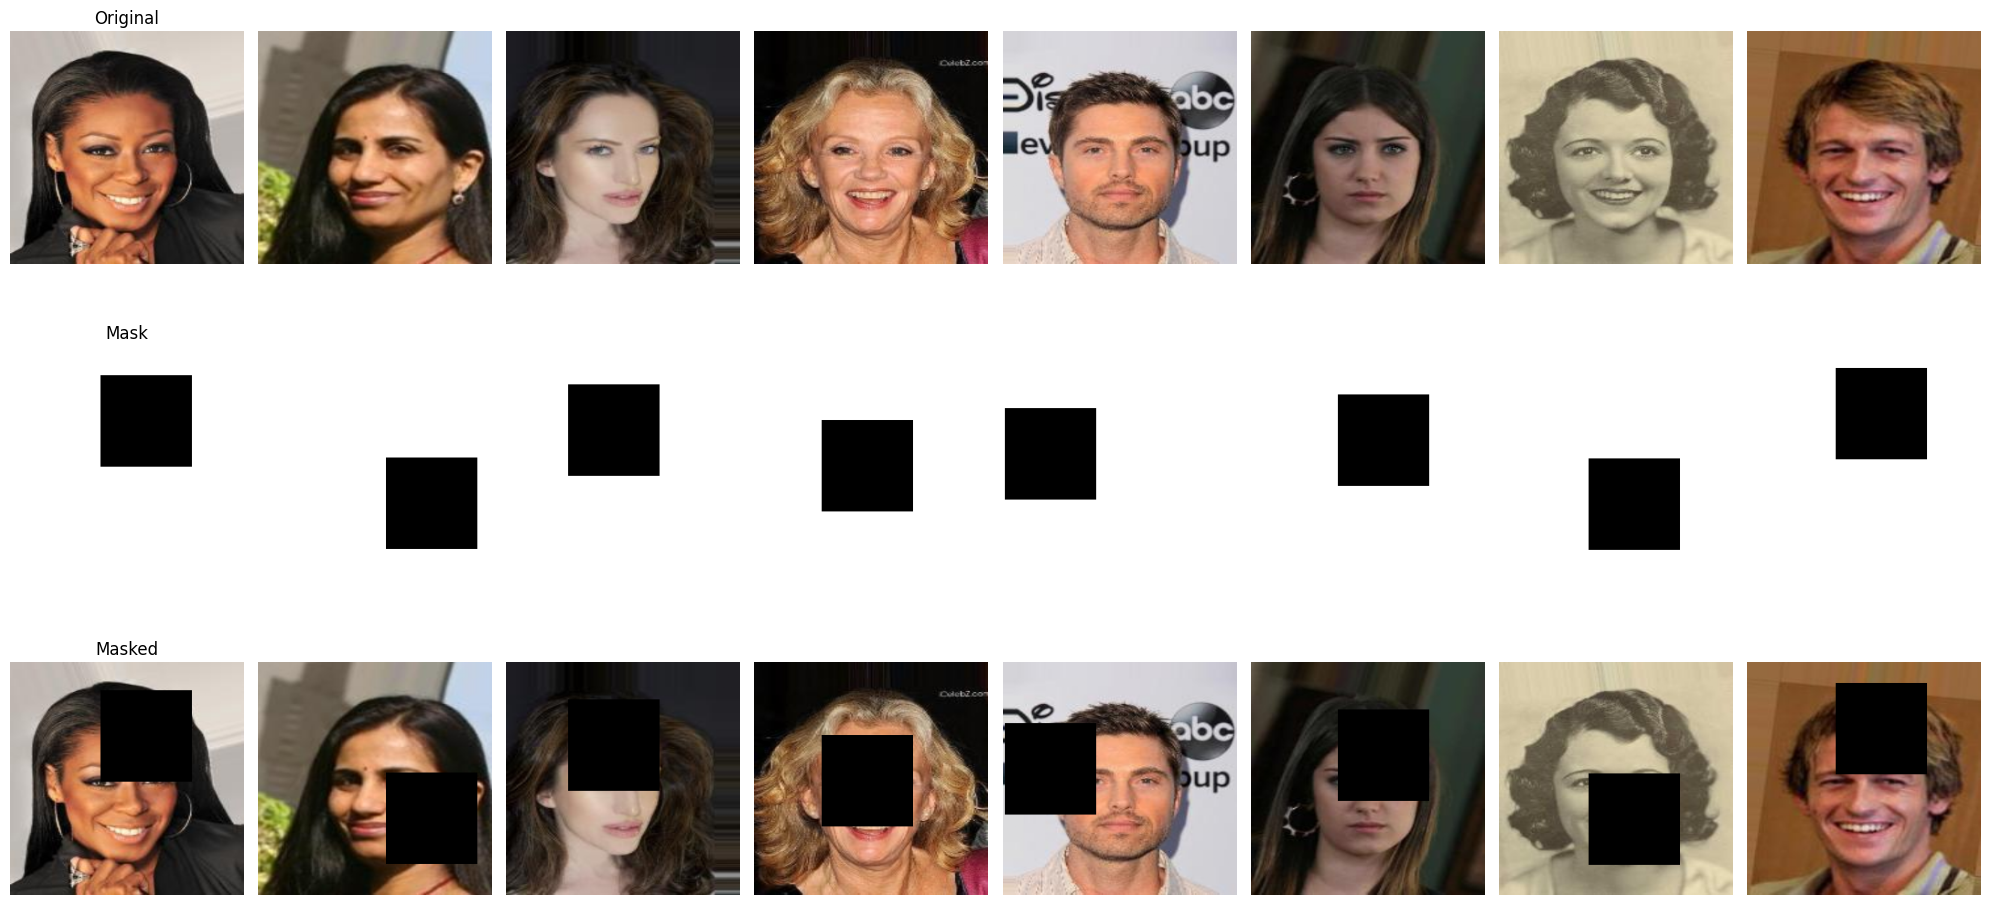

Dataset split and preprocessing pipeline created.
Total dataset size: 202599
Training set size: 162079
Validation set size: 20259
Test set size: 20261
Batch size: 32
Steps per epoch: 5065


In [ ]:
import torch
import torchvision.transforms as transforms
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the CelebA-HQ dataset
ds = load_dataset("saitsharipov/CelebA-HQ")

class CelebAHQDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        item = self.hf_dataset[idx]
        image = item['image']

        if self.transform:
            image = self.transform(image)

        return image

# Define image size
IMG_SIZE = 256

# Define preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

# Create the full dataset
full_dataset = CelebAHQDataset(ds['train'], transform=preprocess)

# Set random seed for reproducibility
torch.manual_seed(42)

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate split sizes
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
val_size = int(val_ratio * total_size)
test_size = total_size - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

def create_mask(image, mask_size=100):
    """Create a random square mask for image inpainting"""
    _, h, w = image.shape
    top = np.random.randint(0, h - mask_size)
    left = np.random.randint(0, w - mask_size)
    mask = torch.ones_like(image)
    mask[:, top:top+mask_size, left:left+mask_size] = 0
    return mask

def apply_mask(image, mask):
    """Apply the mask to the image"""
    return image * mask

# Function to visualize a batch of preprocessed images with masks
def visualize_batch(dataloader, num_images=8):
    # Get a batch of images
    images = next(iter(dataloader))
    images = images[:num_images]  # Select only the first num_images

    # Create masks and apply them
    masks = [create_mask(img) for img in images]
    masked_images = [apply_mask(img, mask) for img, mask in zip(images, masks)]

    # Create a figure with three rows: original images, masks, and masked images
    fig, axes = plt.subplots(3, num_images, figsize=(20, 10))

    for i in range(num_images):
        # Original image
        axes[0, i].imshow(images[i].permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

    plt.tight_layout()
    plt.show()

# Visualize a batch of preprocessed images with masks from the training set
visualize_batch(train_loader)

print("Dataset split and preprocessing pipeline created.")
print(f"Total dataset size: {total_size}")
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {len(train_loader)}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tqdm import tqdm

class ConvLSTMCell(nn.Module):
    def __init__(self, input_channels, hidden_channels, kernel_size):
        super(ConvLSTMCell, self).__init__()

        self.input_channels = input_channels
        self.hidden_channels = hidden_channels
        self.kernel_size = kernel_size
        self.padding = kernel_size // 2

        # Combined gates in one conv operation to improve efficiency
        self.conv_gates = nn.Conv2d(
            input_channels + hidden_channels,
            4 * hidden_channels,  # for i,f,g,o gates
            kernel_size=kernel_size,
            padding=self.padding
        )

    def forward(self, x, h, c):
        if h is None:
            batch_size, _, height, width = x.size()
            h = torch.zeros(batch_size, self.hidden_channels, height, width, device=x.device)
            c = torch.zeros(batch_size, self.hidden_channels, height, width, device=x.device)

        # Concatenate input and hidden state
        combined = torch.cat([x, h], dim=1)

        # Calculate gates
        gates = self.conv_gates(combined)

        # Split gates
        i, f, g, o = torch.split(gates, self.hidden_channels, dim=1)

        i = torch.sigmoid(i)
        f = torch.sigmoid(f)
        g = torch.tanh(g)
        o = torch.sigmoid(o)

        c_next = f * c + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

class ConvLSTMInpainting(nn.Module):
    def __init__(self):
        super(ConvLSTMInpainting, self).__init__()

        # Encoder (reducing spatial dimensions to save memory)
        self.enc_conv1 = nn.Conv2d(6, 32, 3, stride=2, padding=1)  # 6 channels: 3 for RGB + 3 for mask
        self.enc_conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)

        # ConvLSTM layer
        self.convlstm = ConvLSTMCell(64, 64, kernel_size=3)

        # Decoder
        self.dec_conv1 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1)
        self.dec_conv2 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
        self.final_conv = nn.Conv2d(16, 3, 3, padding=1)

        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(32)
        self.bn4 = nn.BatchNorm2d(16)

    def forward(self, x, mask, seq_len=3):
        # Concatenate input image and mask
        x = torch.cat([x, mask], dim=1)  # Now 6 channels (3 RGB + 3 mask)

        # Encoding (with dimension reduction)
        x = F.relu(self.bn1(self.enc_conv1(x)))  # Reduce spatial dimensions
        x = F.relu(self.bn2(self.enc_conv2(x)))  # Further reduce

        # ConvLSTM processing
        h, c = None, None
        for _ in range(seq_len):
            h, c = self.convlstm(x, h, c)

        # Decoding (with upsampling)
        x = F.relu(self.bn3(self.dec_conv1(h)))
        x = F.relu(self.bn4(self.dec_conv2(x)))
        x = torch.tanh(self.final_conv(x))

        return x

def train_epoch(model, train_loader, optimizer, criterion, device, batch_size):
    model.train()
    total_loss = 0

    for i, batch in enumerate(train_loader):
        # Process in smaller sub-batches to save memory
        for j in range(0, len(batch), batch_size):
            sub_batch = batch[j:j+batch_size].to(device)

            # Create masks
            masks = torch.stack([create_mask(img) for img in sub_batch]).to(device)
            masked_images = apply_mask(sub_batch, masks)

            optimizer.zero_grad()
            outputs = model(masked_images, masks)
            loss = criterion(outputs, sub_batch)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            # Clear cache
            del outputs, loss
            torch.cuda.empty_cache()

    return total_loss / len(train_loader)

def validate(model, val_loader, criterion, device, batch_size):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            for j in range(0, len(batch), batch_size):
                sub_batch = batch[j:j+batch_size].to(device)
                masks = torch.stack([create_mask(img) for img in sub_batch]).to(device)
                masked_images = apply_mask(sub_batch, masks)

                outputs = model(masked_images, masks)
                loss = criterion(outputs, sub_batch)
                total_loss += loss.item()

                del outputs, loss
                torch.cuda.empty_cache()

    return total_loss / len(val_loader)

def train_model(model, train_loader, val_loader, num_epochs=2, device='cuda', batch_size=4):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.L1Loss()

    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, batch_size)
        val_loss = validate(model, val_loader, criterion, device, batch_size)

        print(f'Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_convlstm_inpainting.pth')

        # Clear cache after each epoch
        torch.cuda.empty_cache()

# Main execution
if __name__ == "__main__":
    # Create model with smaller batch size and reduced dimensions
    model = ConvLSTMInpainting()
    BATCH_SIZE = 4  # Reduced batch size

    # Modify data loaders to use smaller batch size
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Train the model
    train_model(model, train_loader, val_loader, num_epochs=2, device=device, batch_size=BATCH_SIZE)

Using device: cuda
Epoch 1: Train Loss = 0.0388, Val Loss = 0.0324
Epoch 2: Train Loss = 0.0304, Val Loss = 0.0311


<ipython-input-8-88c36b5b016c>:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_convlstm_inpainting.pth', map_location=device))


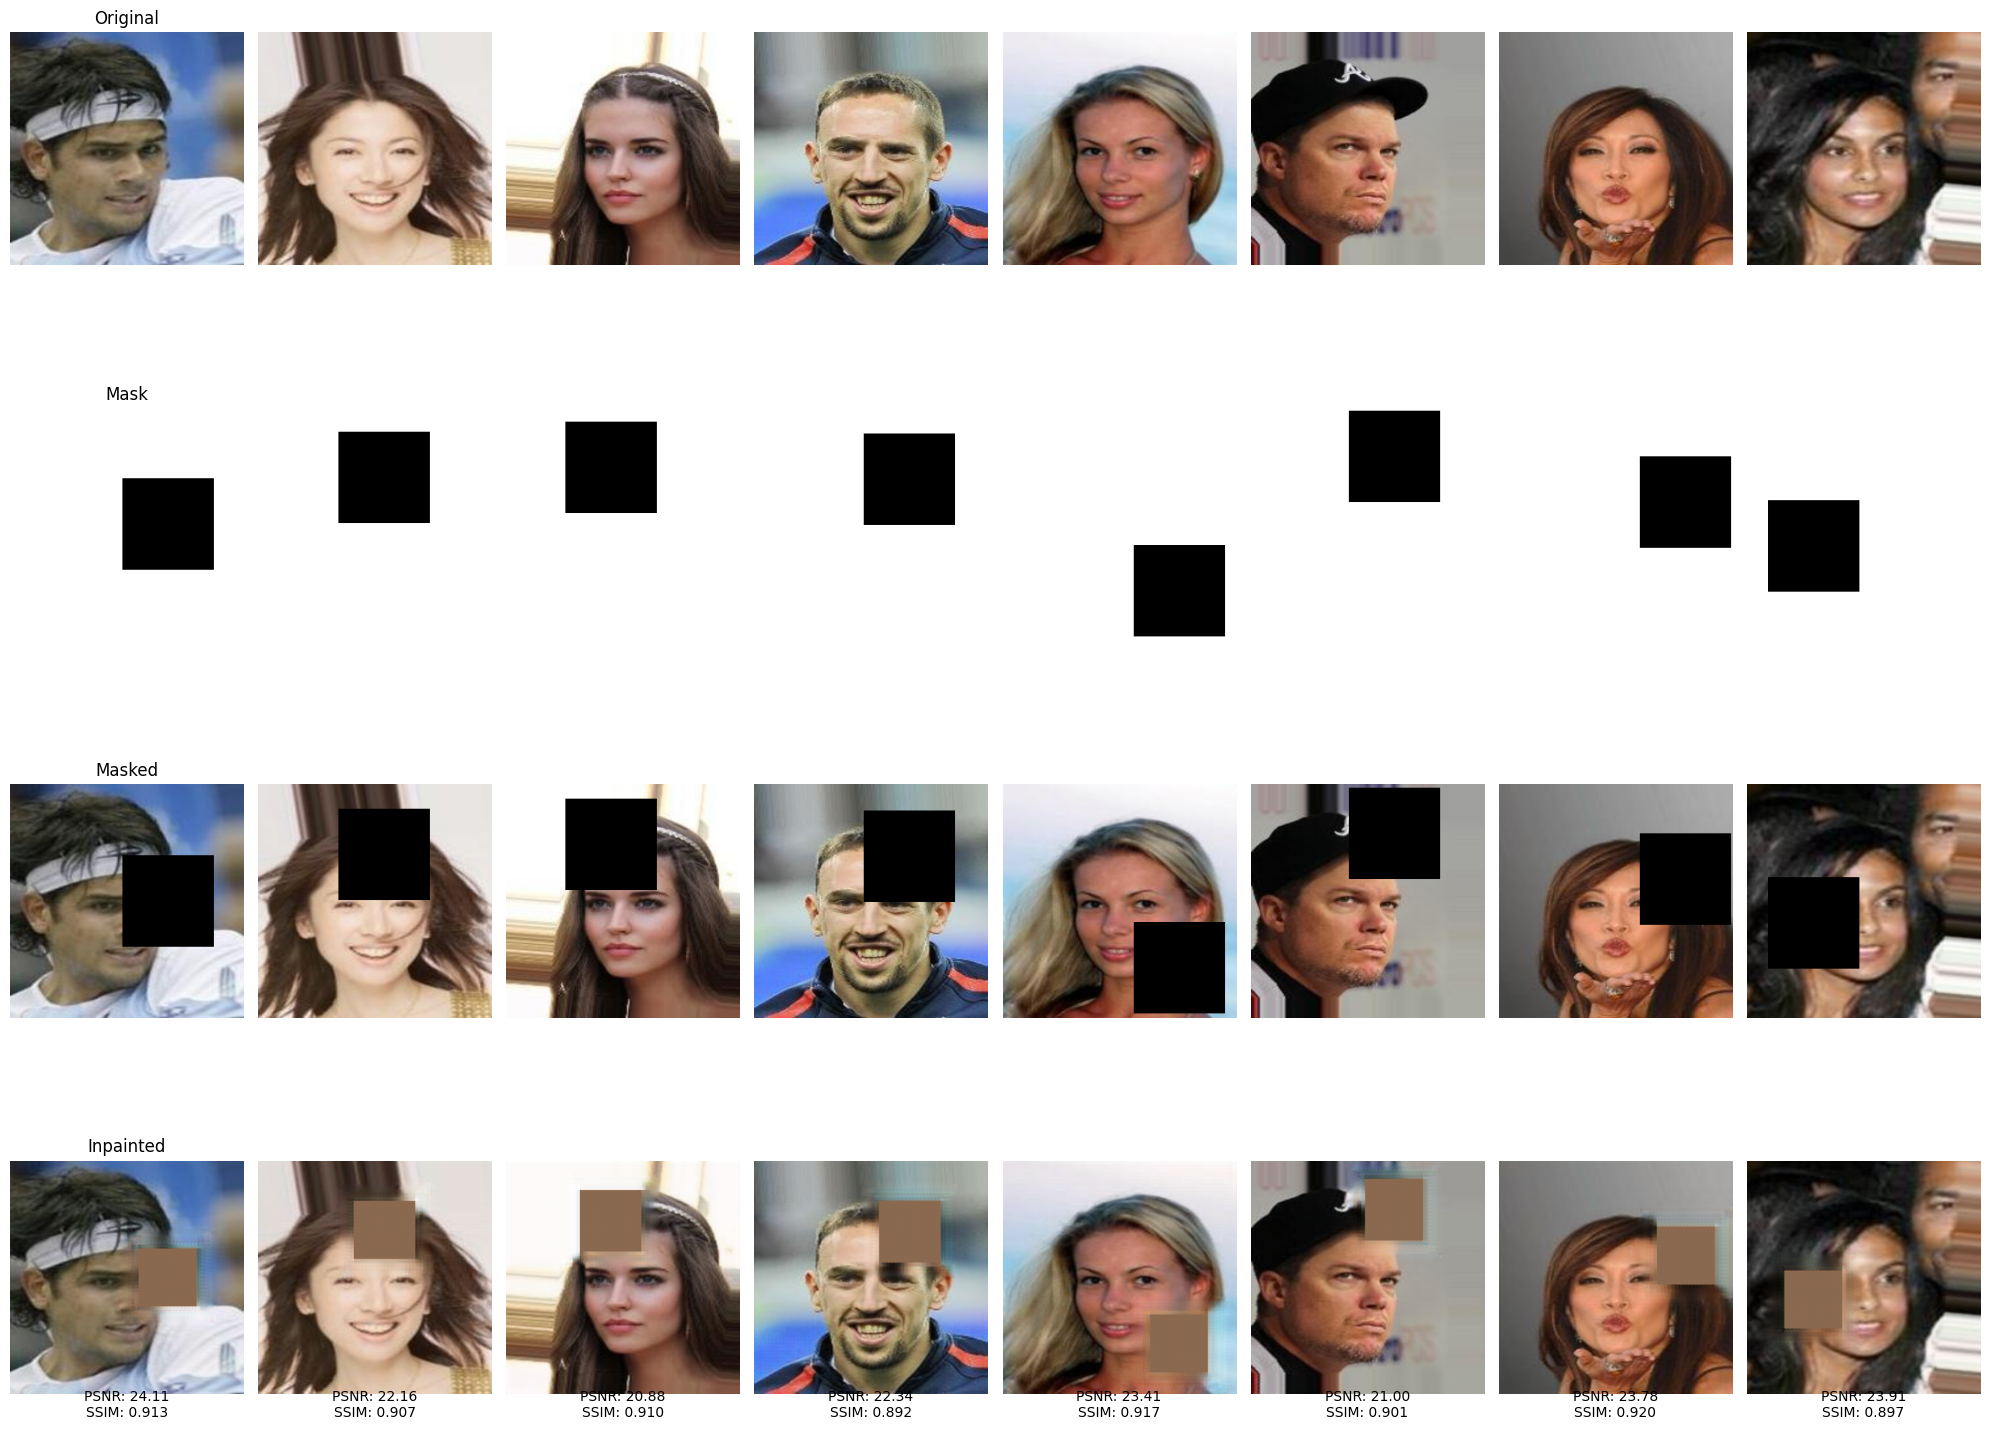


Overall Metrics:
Average PSNR: 22.70 dB
Average SSIM: 0.907

Model Performance Interpretation:
PSNR: Fair to poor quality (<25 dB)
SSIM: Excellent structural similarity (>0.90)


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import numpy as np

def evaluate_model(model, test_loader, device, num_samples=8):
    """
    Evaluate the inpainting model and display results with metrics
    """
    model.eval()
    all_psnr = []
    all_ssim = []

    # Get a batch of images for visualization
    batch = next(iter(test_loader))
    batch = batch[:num_samples].to(device)

    # Create and apply masks
    masks = torch.stack([create_mask(img) for img in batch]).to(device)
    masked_images = apply_mask(batch, masks)

    with torch.no_grad():
        # Generate inpainted images
        inpainted = model(masked_images, masks)

        # Calculate metrics for each image
        for i in range(num_samples):
            # Convert images to numpy arrays for metric calculation
            original = batch[i].cpu().permute(1, 2, 0).numpy()
            result = inpainted[i].cpu().permute(1, 2, 0).numpy()

            # Clip values to valid range
            original = np.clip(original, 0, 1)
            result = np.clip(result, 0, 1)

            # Calculate PSNR
            psnr_value = psnr(original, result)
            all_psnr.append(psnr_value)

            # Calculate SSIM
            ssim_value = ssim(original, result, channel_axis=2, data_range=1.0)
            all_ssim.append(ssim_value)

    # Display results
    fig, axes = plt.subplots(4, num_samples, figsize=(20, 16))

    for i in range(num_samples):
        # Original image
        axes[0, i].imshow(batch[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')

        # Mask
        axes[1, i].imshow(masks[i].cpu().permute(1, 2, 0), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Mask')

        # Masked image
        axes[2, i].imshow(masked_images[i].cpu().permute(1, 2, 0))
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Masked')

        # Inpainted result
        axes[3, i].imshow(inpainted[i].cpu().permute(1, 2, 0))
        axes[3, i].axis('off')
        if i == 0:
            axes[3, i].set_title('Inpainted')

        # Add metrics as text
        axes[3, i].text(0.5, -0.1, f'PSNR: {all_psnr[i]:.2f}\nSSIM: {all_ssim[i]:.3f}',
                       horizontalalignment='center',
                       transform=axes[3, i].transAxes)

    plt.tight_layout()
    plt.show()

    # Print average metrics
    print("\nOverall Metrics:")
    print(f"Average PSNR: {np.mean(all_psnr):.2f} dB")
    print(f"Average SSIM: {np.mean(all_ssim):.3f}")

    # Interpret results
    print("\nModel Performance Interpretation:")

    # PSNR interpretation
    avg_psnr = np.mean(all_psnr)
    if avg_psnr > 30:
        print("PSNR: Excellent quality (>30 dB)")
    elif avg_psnr > 25:
        print("PSNR: Good quality (25-30 dB)")
    else:
        print("PSNR: Fair to poor quality (<25 dB)")

    # SSIM interpretation
    avg_ssim = np.mean(all_ssim)
    if avg_ssim > 0.90:
        print("SSIM: Excellent structural similarity (>0.90)")
    elif avg_ssim > 0.80:
        print("SSIM: Good structural similarity (0.80-0.90)")
    else:
        print("SSIM: Fair to poor structural similarity (<0.80)")

def main():
    # Load the trained model
    model = ConvLSTMInpainting()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.load_state_dict(torch.load('best_convlstm_inpainting.pth', map_location=device))
    model = model.to(device)

    # Create test dataloader with a smaller batch size for visualization
    BATCH_SIZE = 8
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

    # Evaluate the model
    evaluate_model(model, test_loader, device)

if __name__ == "__main__":
    main()